#**Data Analysis- Exploratory Data Analysis on --> _Diwali Sales Data_**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/Diwali Sales Data.csv',encoding='unicode_escape')


In [3]:
df.shape

(11251, 15)

In [4]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN




#**Data cleaning**



In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
#drop unrelated blank
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [7]:
#check the null value
df.isnull().sum()

,0
User_ID,0
Cust_name,0
Product_ID,0
Gender,0
Age Group,0
Age,0
Marital_Status,0
State,0
Zone,0
Occupation,0


In [8]:
#drop the null value
df.dropna(inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11239 non-null  int64  
 1   Cust_name         11239 non-null  object 
 2   Product_ID        11239 non-null  object 
 3   Gender            11239 non-null  object 
 4   Age Group         11239 non-null  object 
 5   Age               11239 non-null  int64  
 6   Marital_Status    11239 non-null  int64  
 7   State             11239 non-null  object 
 8   Zone              11239 non-null  object 
 9   Occupation        11239 non-null  object 
 10  Product_Category  11239 non-null  object 
 11  Orders            11239 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.2+ MB


In [10]:
df['Amount'].dtypes

dtype('float64')

In [11]:
#change data type
df['Amount']=df['Amount'].astype('int')

In [12]:
df['Amount'].dtypes

dtype('int64')

In [13]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [14]:
df.rename(columns={'Marital_Status':'Shaddi'})

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Shaddi,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [15]:
#describe about the numeric data
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [16]:
#describe about the specific column data
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


#**Exploratory Data Analysis**

In [17]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

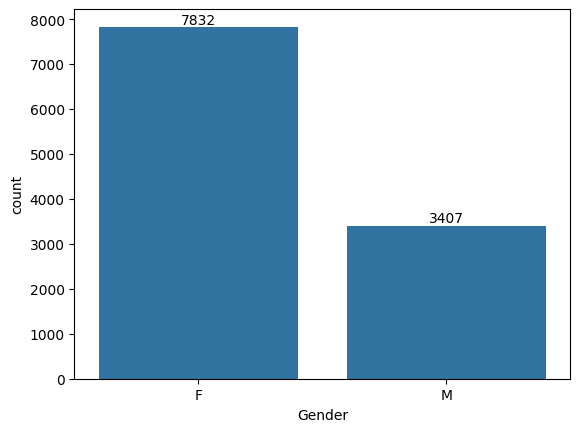

In [24]:
ax=sns.countplot(x='Gender',data=df)

for bars in ax.containers:
  ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

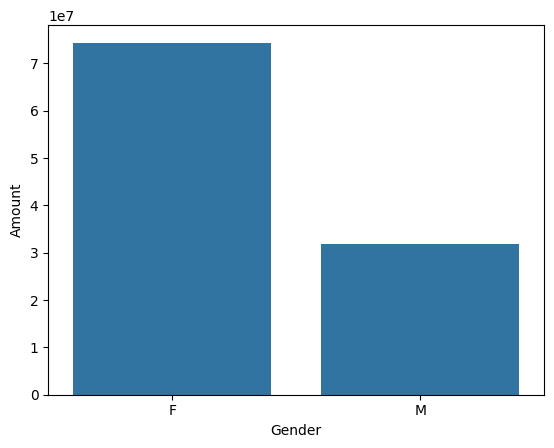

In [27]:
 sale_gen=df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by=['Amount'],ascending=False)
 sns.barplot(x='Gender',y='Amount',data=sale_gen)

From the above graph we can see that most of the buyers are Female and even the purcheshing power of the female are greater than men

#**Age**

In [28]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

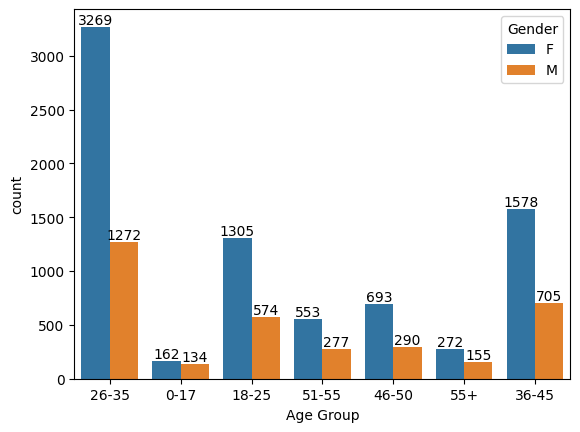

In [38]:
ax_age_group = sns.countplot(x='Age Group',data=df,hue='Gender')

for bars in ax_age_group.containers:
  ax_age_group.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

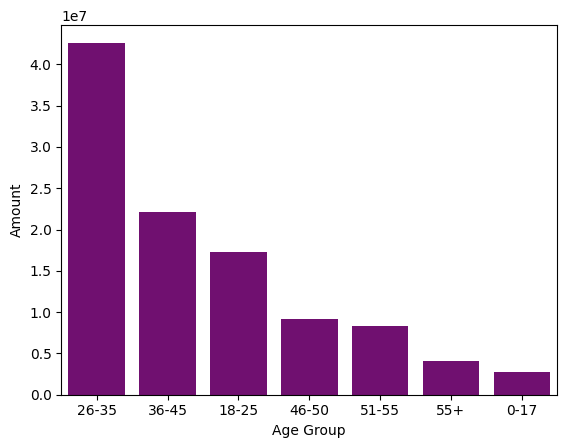

In [47]:
#Total amount vs age group
sales_age=df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Age Group',y='Amount',data=sales_age,color='purple')

**From the above graph we can see that most of the buyrs are in age of 26-35 yrs Female**

#**State**

In [70]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<Axes: xlabel='State', ylabel='Orders'>

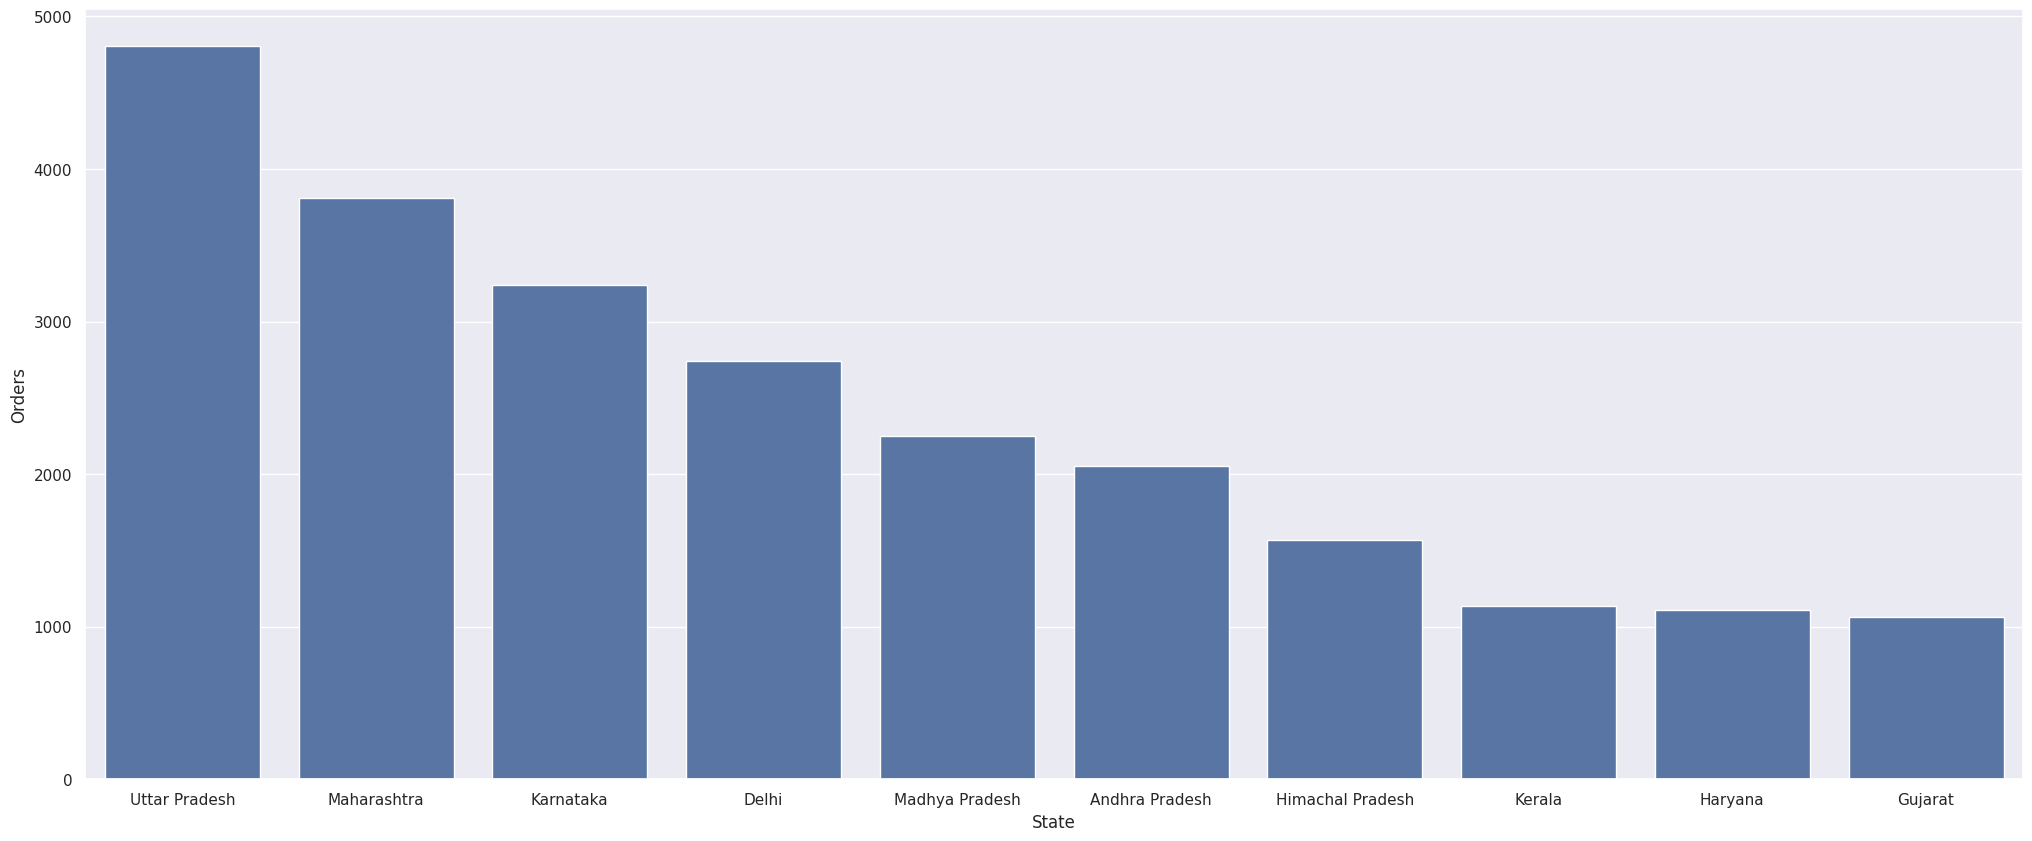

In [71]:
#total number of order from top 10 state

order_state = df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(['Orders'],ascending=False).head(10)
sns.set(rc={'figure.figsize':(25,10)})
sns.barplot(x='State',y='Orders',data=order_state)

<Axes: xlabel='State', ylabel='Amount'>

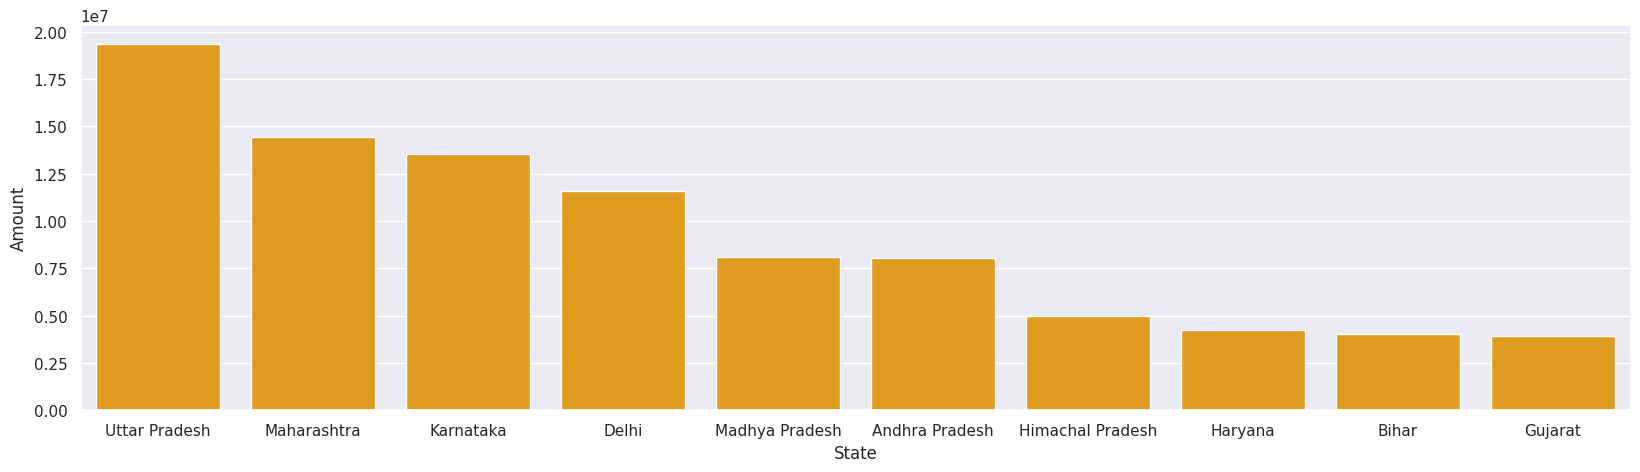

In [72]:
#total number of sales from top 10 state
sales_state=df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(['Amount'],ascending=False).head(10)
sales_state
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x='State',y='Amount',data=sales_state,color='orange')

form the above graph we can see that the max amount of sales and order are happen uttar pradesh,maharashtra,karnataka

#**Merital Status**

In [73]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

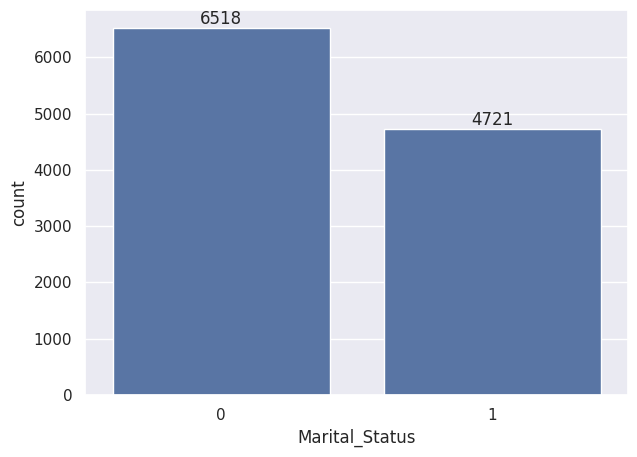

In [85]:
ax=sns.countplot(x='Marital_Status',data=df)
# df['Marital_Status']
sns.set(rc={'figure.figsize':(7,5)})
for bars in ax.containers:
  ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

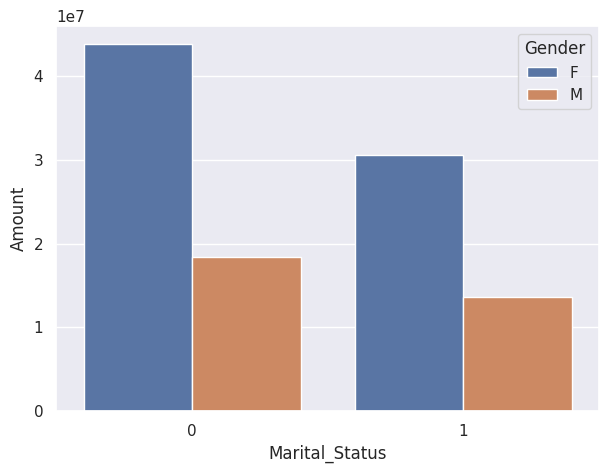

In [84]:
ax_Marital_Status=df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(['Amount'],ascending=False)
ax_Marital_Status
sns.set(rc={'figure.figsize':(7,5)})
sns.barplot(x='Marital_Status',y='Amount',data=ax_Marital_Status,hue='Gender')

**from the above graph we can see that most of the buyer are married
 (women) and they have the high purchesing power**

#**Occupation**

In [86]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

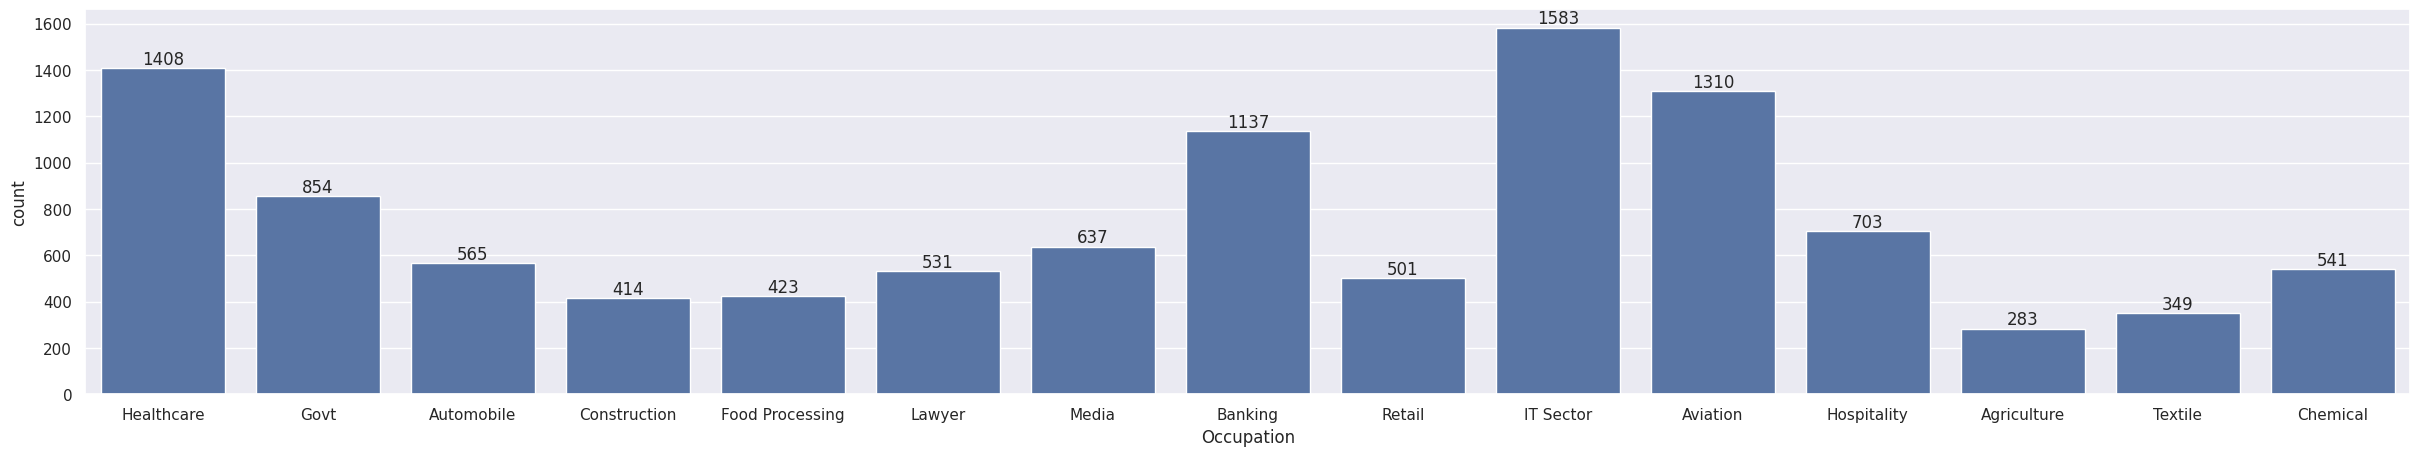

In [93]:
ax=sns.countplot(x='Occupation',data=df)
sns.set(rc={'figure.figsize':(30,5)})
for bars in ax.containers:
  ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

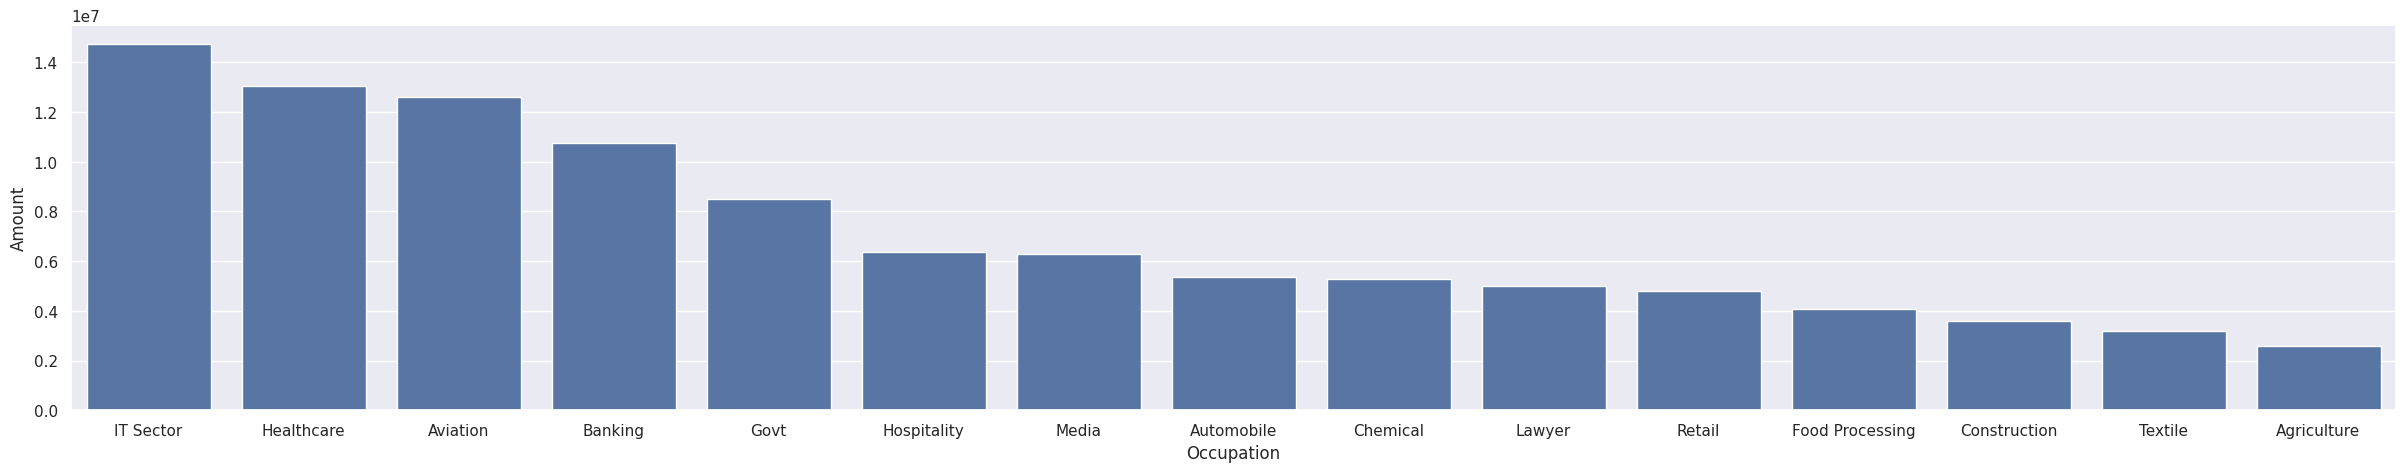

In [94]:
Occupation_status=df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(['Amount'],ascending=False)
sns.barplot(x='Occupation',y='Amount',data=Occupation_status)

**from the above graph we can see that most of the buyer are from IT  , Healthcare and Aviation sector**

#**Product catagory**

In [95]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

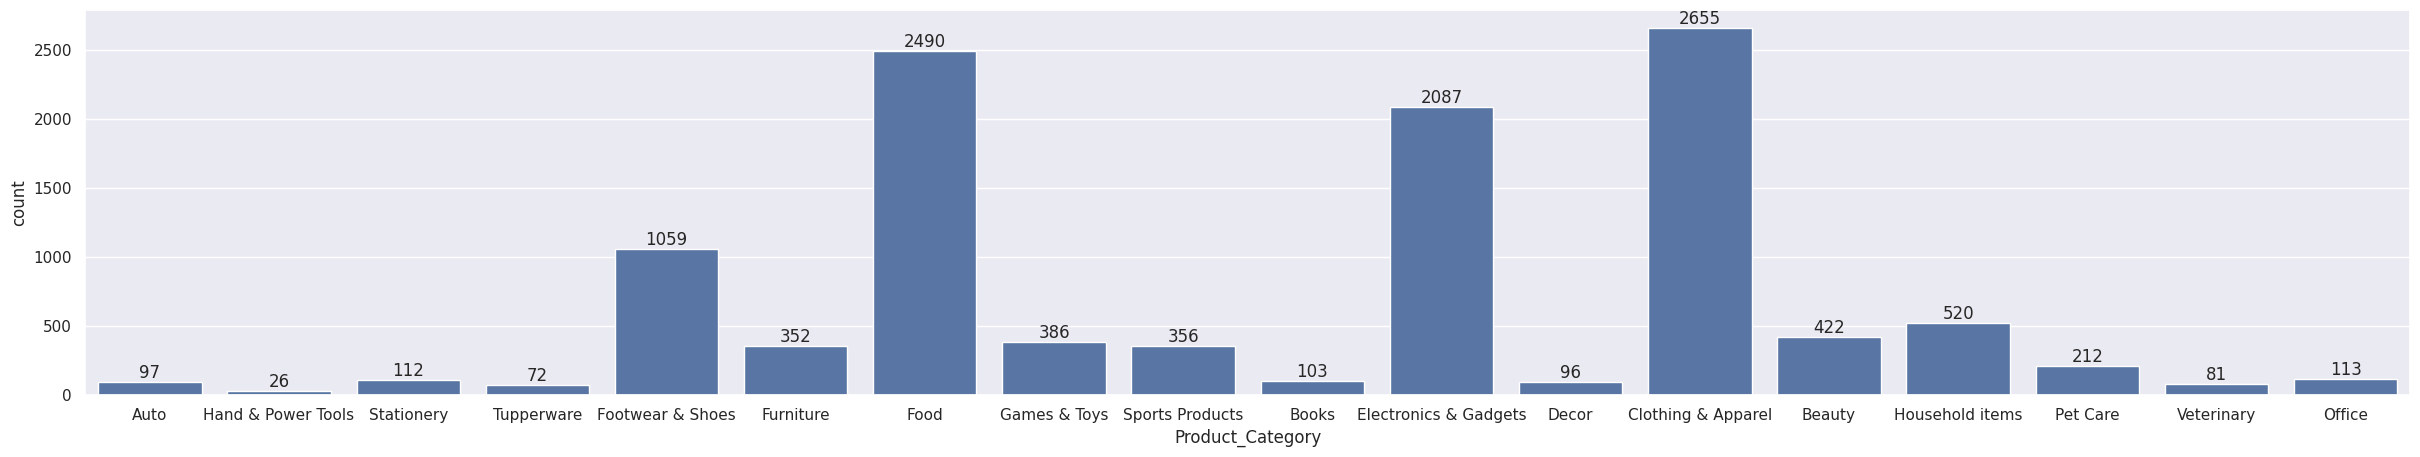

In [97]:
ax=sns.countplot(x='Product_Category',data=df)

for bars in ax.containers:
  ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

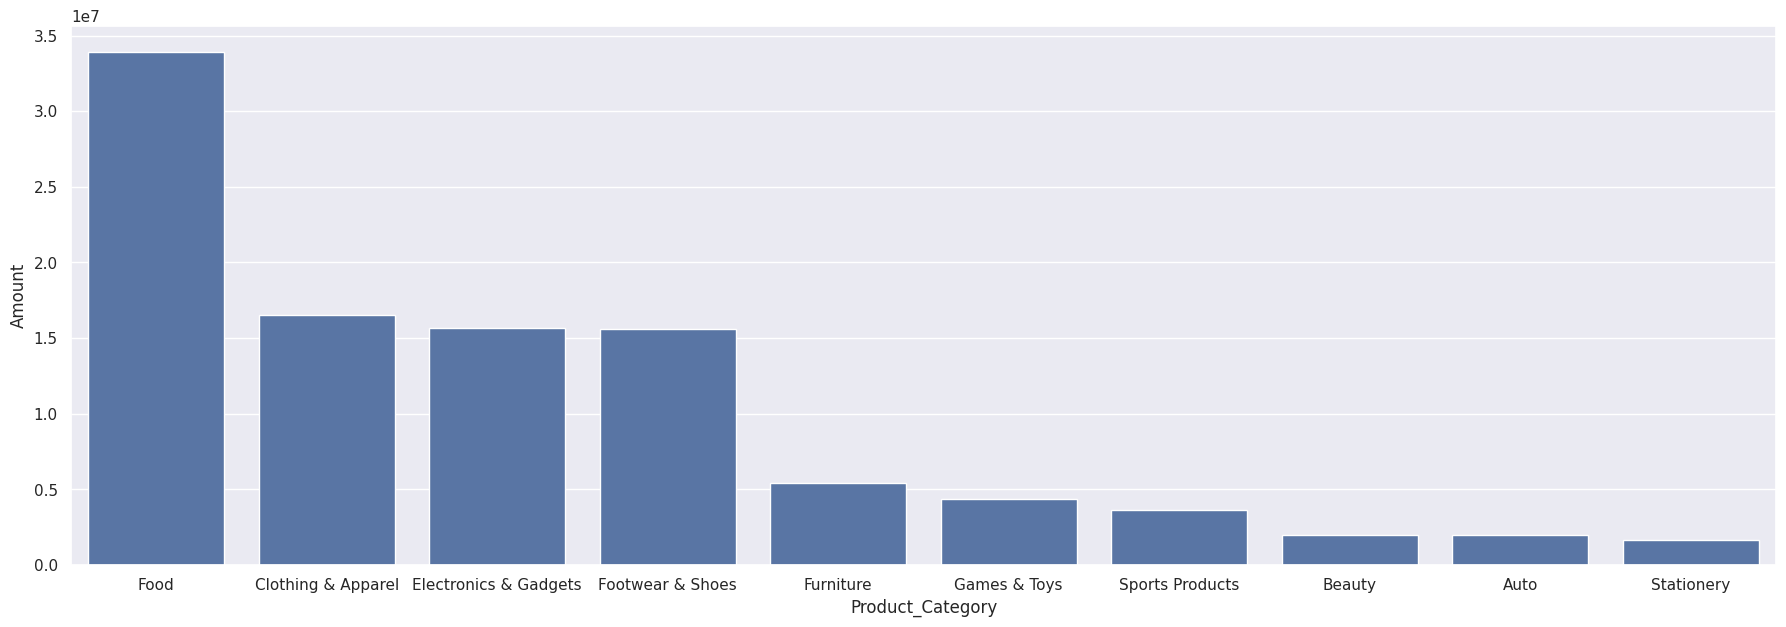

In [108]:
Product_Category_status=df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values('Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(22,7)})
sns.barplot(x='Product_Category',y='Amount',data=Product_Category_status)

**From the above graph we see that food and clothing and Electronics has the high purcheshing power**

#**Conclution**

**Married Women are 26-35 yrs uttar pradesh,maharashtra,karnataka working in IT , Healthcare and Aviation sector are more likely to buy product from food and clothing and Electronics **